### File Uploads

In [450]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.dates as mdates 
import numpy as np
import datetime

In [451]:
#north dorms
dickson = pd.read_excel("/Users/elanapocress/Documents/orie_project/dickson.xlsx")
donlon = pd.read_excel("/Users/elanapocress/Documents/orie_project/donlon.xlsx")
mews = pd.read_excel("/Users/elanapocress/Documents/orie_project/mews.xlsx")
kay = pd.read_excel("/Users/elanapocress/Documents/orie_project/kay.xlsx")

### Constants

In [452]:
donlon_count = 450
mews_count = 260
dickson_count = 460
kay_count = 275
#Source for resident counts: 
#https://scl.cornell.edu/residential-life/housing/campus-housing/first-year-undergraduates/residence-halls

### Isolating electric

In [453]:
dickson_electric = dickson.loc[dickson["pointTitle"] == "Electric"]
mews_electric = mews.loc[mews["pointTitle"] == "Electric"]
kay_electric = kay_electric = kay.loc[kay["pointTitle"] == "Electric"]
donlon_electric = donlon_electric = donlon.loc[donlon["pointTitle"] == "Electric"]

In [454]:
# dickson_electric['slottime_GMT'] = pd.to_datetime(dickson_electric['slottime_GMT']).dt.normalize()
# donlon_electric['slottime_GMT'] = pd.to_datetime(donlon_electric['slottime_GMT']).dt.normalize()
# mews_electric['slottime_GMT'] = pd.to_datetime(mews_electric['slottime_GMT']).dt.normalize()
# kay_electric['slottime_GMT'] = pd.to_datetime(kay_electric['slottime_GMT']).dt.normalize()

## Per person

In [455]:
dickson_per_person = dickson_electric["slotavg"] / dickson_count
mews_per_person = mews_electric["slotavg"] / mews_count
donlon_per_person = donlon_electric["slotavg"] / donlon_count
kay_per_person = kay_electric["slotavg"] / kay_count

In [ ]:
### make dates more readable

In [456]:
dickson_electric['slottime_GMT'] = dickson_electric['slottime_GMT'].str[:11]
donlon_electric['slottime_GMT'] = donlon_electric['slottime_GMT'].str[:11]
mews_electric['slottime_GMT'] = mews_electric['slottime_GMT'].str[:11]
kay_electric['slottime_GMT'] = kay_electric['slottime_GMT'].str[:11]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220]),
 <a list of 23 Text xticklabel objects>)

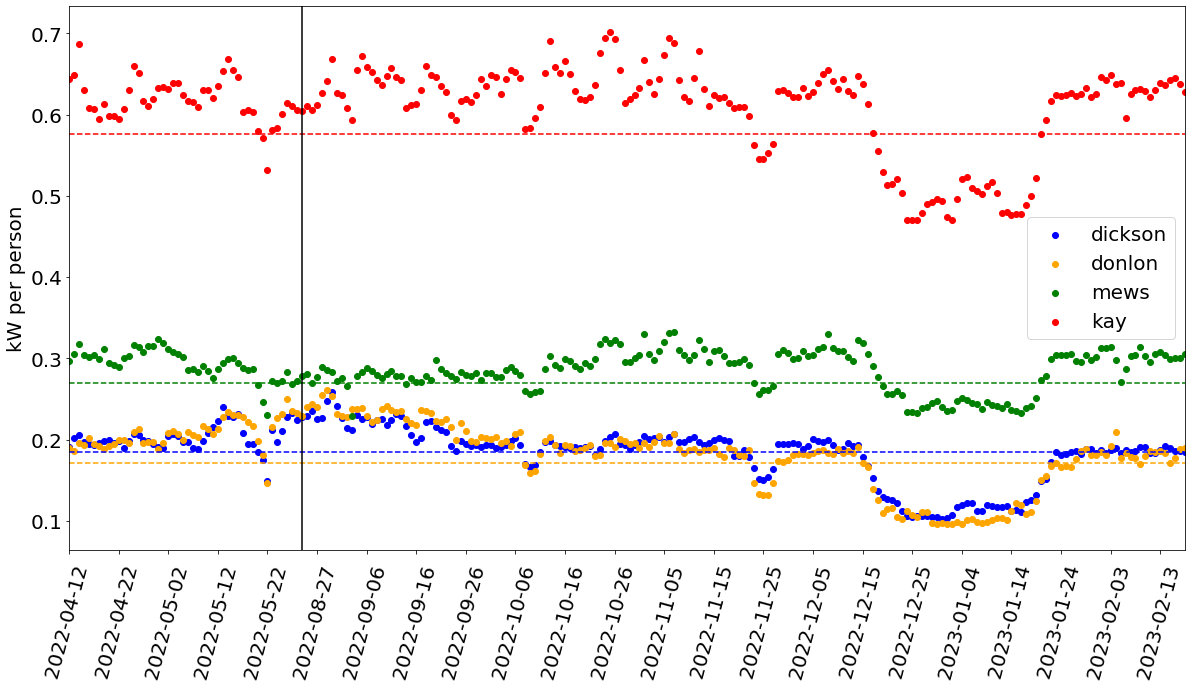

In [463]:
plt.rcParams["figure.figsize"] = (20,10)


plt.scatter(dickson_electric["slottime_GMT"], dickson_per_person, label="dickson", color="blue")
plt.scatter(donlon_electric["slottime_GMT"], donlon_per_person, label="donlon", color="orange")
plt.scatter(mews_electric["slottime_GMT"], mews_per_person, label="mews", color="green")
plt.scatter(kay_electric["slottime_GMT"], kay_per_person, label="kay", color="red")



plt.axhline(y=np.nanmean(dickson_per_person), color="blue", linestyle="--")
plt.axhline(y=np.nanmean(donlon_per_person), color ="orange", linestyle="--")
plt.axhline(y=np.nanmean(mews_per_person), color="green", linestyle="--")
plt.axhline(y=np.nanmean(kay_per_person), color="red", linestyle="--")
plt.axvline(x = 47, color="black") # break in data for summer


plt.legend()

plt.ylabel("kW per person", fontsize = 20)
plt.xlim([0,225]) #limiting to 225 days because it looks like there is no data after that (flattens out)
plt.rc('xtick', labelsize=20) 

# plt.xticks([0, 5,10, 15, 20,25, 30,35, 40, 45,50,55, 60,65, 70,75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,  150, 155, 160, 165, 170, 175, 180, 185 , 190, 195, 200,205, 210,215, 220, 225, 230, 235, 240, 245])
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220])

plt.xticks(rotation = 75)

